# Producing Bottles

See textfile for explanation

In [1]:
import scipy.stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input

probability functions and parameters, number of experiments, number of bottles produced

In [2]:
n = 1000 #1000 experiments
m = 100 #100 bottles

lambda1 = 1 #arrival rate
lambda2 = 1.3 #service rate

max_stuck = 3 #how many bottles may be in second stage before machine breaks
# If lambda1 >> lambda2, probably you will break the system a lot

# Random draws for arrival and service

One row = one scenario

In [3]:
# How long until next arrival
arrivals = st.expon.rvs(size=(n,m), scale = lambda1)
arrivals = arrivals.cumsum(axis=1)
arrivals = pd.DataFrame(arrivals)

# How long until service
service = st.expon.rvs(size=(n,m), scale = lambda2)
service = pd.DataFrame(service)

# Function

In [4]:
def process(arrivals, service, buffer):
    print("Starting calculation for buffer " + str(buffer))
    finish = pd.DataFrame(np.zeros(arrivals.shape))
    occupied = pd.DataFrame(np.zeros(arrivals.shape))
    stuck = pd.DataFrame(np.zeros(arrivals.shape))
    arrival_at_two = pd.DataFrame(np.zeros(arrivals.shape))

    for t in range(arrivals.shape[1]):
        
        if t==0:
            arrival_at_two.iloc[:,t] = arrivals.iloc[:,t]
            finish.iloc[:,t] = arrival_at_two.iloc[:,t]+service.iloc[:,t]

        else:
            occupied.iloc[:,t] = (finish.iloc[:,:t].apply(lambda x: x>arrivals.iloc[:,t]) & # not finished
                                  arrival_at_two.iloc[:,:t].apply(lambda x: x<arrivals.iloc[:,t])).any(axis=1) # but has arrived
            
            stuck.iloc[:,t] = (finish.iloc[:,:t].apply(lambda x: x>arrivals.iloc[:,t]) & # not finished
                               arrival_at_two.iloc[:,:t].apply(lambda x: x<arrivals.iloc[:,t])).sum(axis=1) # but has arrived
            
            arrival_at_two.iloc[:,t] = arrivals.iloc[:,t].values+buffer*occupied.iloc[:,t].values

            finish.iloc[:,t] = arrival_at_two.iloc[:,t]+service.iloc[:,t]
           
    print("Finished.")
    
    return arrival_at_two, finish, occupied, stuck

# Choose some buffer times, run the simulation

In [5]:
buffers = [0,1,2,5,10,15,20,35,50,60,75,100,150]

results = [process(arrivals, service, buffer) for buffer in buffers]

Starting calculation for buffer 0
Finished.
Starting calculation for buffer 1
Finished.
Starting calculation for buffer 2
Finished.
Starting calculation for buffer 5
Finished.
Starting calculation for buffer 10
Finished.
Starting calculation for buffer 15
Finished.
Starting calculation for buffer 20
Finished.
Starting calculation for buffer 35
Finished.
Starting calculation for buffer 50
Finished.
Starting calculation for buffer 60
Finished.
Starting calculation for buffer 75
Finished.
Starting calculation for buffer 100
Finished.
Starting calculation for buffer 150
Finished.


# Breakdowns

In [6]:
breakdowns = [(results[i][3].max(axis=1)>max_stuck).sum() for i in range(len(buffers))]

In [7]:
breakdowns

[883, 851, 823, 812, 767, 752, 699, 555, 393, 336, 202, 26, 0]

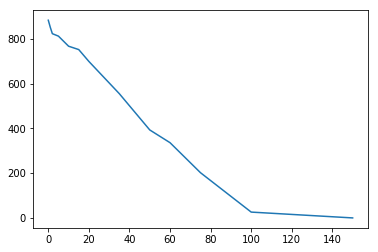

In [8]:
plt.plot(buffers, breakdowns)

# Production rate

In [9]:
mean_process_time = [results[i][1].max(axis=1).mean() for i in range(len(buffers))]
mean_process_time

[102.15315570530346,
 102.90290786357613,
 103.77909459709466,
 106.71468248150242,
 111.62376328572623,
 116.66725509838729,
 121.65689981078035,
 136.67139041126418,
 151.5223796409409,
 161.48879374849605,
 176.47451422108102,
 200.99746040455122,
 250.65655931325406]

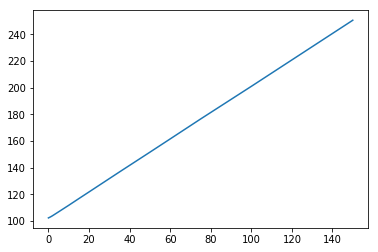

In [10]:
plt.plot(buffers, mean_process_time)